<a href="https://colab.research.google.com/github/FRNEYRA10/FRNEYRA10/blob/main/Diferencias_Progresivas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

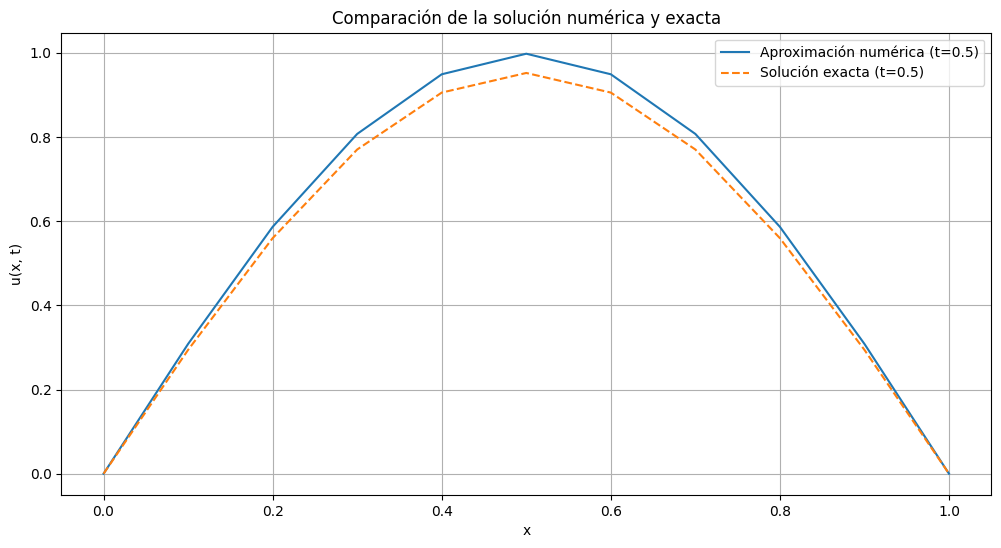

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
L = 1.0              # Longitud del dominio
T = 0.5             # Tiempo total
M = 10               # Número de posiciones en x
N = 50               # Número de pasos en t
h =  0.1          # Tamaño del paso en x
k =  0.0005          # Tamaño del paso en t
alpha = 0.01         # Difusividad, se puede ajustar según el problema

# Inicialización del dominio en x y t
x = np.linspace(0, L, M+1)
t = np.linspace(0, T, N+1)

# Inicialización de la solución
u = np.zeros((N+1, M+1))

# Condiciones iniciales
u[0, :] = np.sin(np.pi * x)  # u(x, 0) = sin(pi*x)

# Condiciones de frontera
u[:, 0] = 0  # u(0, t) = 0
u[:, -1] = 0  # u(1, t) = 0

# Método de diferencias finitas
for n in range(0, N):
    for m in range(1, M):
        u[n+1, m] = u[n, m] + (alpha * k / h**2) * (u[n, m+1] - 2*u[n, m] + u[n, m-1])

# Solución exacta para comparación
u_exacta = np.zeros((N+1, M+1))
for n in range(N+1):
    for m in range(M+1):
        u_exacta[n, m] = np.exp(-alpha * np.pi**2 * t[n]) * np.sin(np.pi * x[m])

# Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(x, u[N, :], label='Aproximación numérica (t=0.5)')
plt.plot(x, u_exacta[N, :], label='Solución exacta (t=0.5)', linestyle='--')
plt.title('Comparación de la solución numérica y exacta')
plt.xlabel('x')
plt.ylabel('u(x, t)')
plt.legend()
plt.grid()
plt.show()

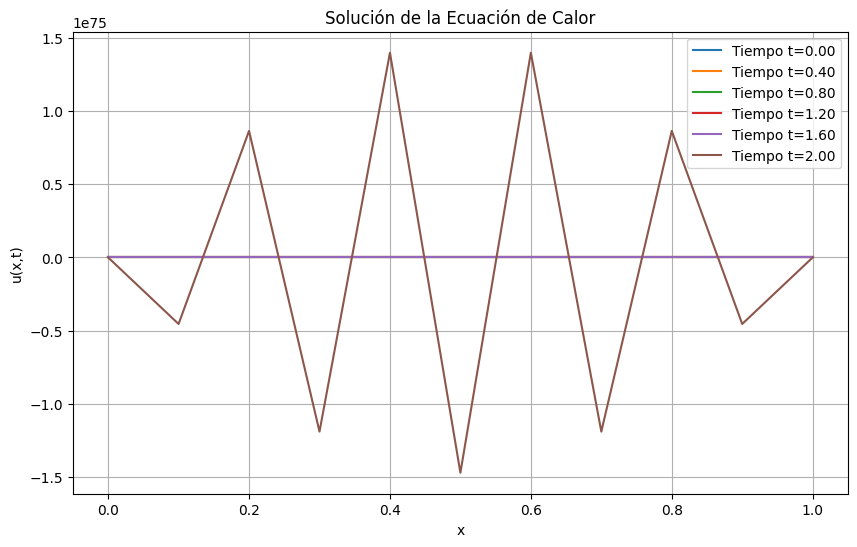

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
L = 1.0         # Longitud del dominio
T = 2.0         # Tiempo total
h = 0.1         # Tamaño de paso espacial
k = 0.01        # Tamaño de paso temporal

# Número de puntos espaciales y temporales
Nx = int(L / h) + 1
Nt = int(T / k) + 1

# Crear mallas
x = np.linspace(0, L, Nx)
t = np.linspace(0, T, Nt)

# Inicializar la matriz U
U = np.zeros((Nt, Nx))

# Conditions iniciales: u(x,0) = sin(pi * x)
for i in range(Nx):
    U[0, i] = np.sin(np.pi * x[i])

# Conditions de frontera: u(0,t) = 0 y u(1,t) = 0
for n in range(1, Nt):
    U[n, 0] = 0                 # Condición en x=0
    U[n, -1] = 0                # Condición en x=L

# Coeficiente
alpha = k / (h**2)

# Método de diferencias hacia adelante
for n in range(0, Nt-1):
    for i in range(1, Nx-1):
        U[n+1, i] = U[n, i] + alpha * (U[n, i+1] - 2*U[n, i] + U[n, i-1])

# Graficar resultados
plt.figure(figsize=(10, 6))
for n in range(0, Nt, Nt // 5):  # Graficar algunos instantes de tiempo
    plt.plot(x, U[n, :], label=f'Tiempo t={t[n]:.2f}')

plt.title('Solución de la Ecuación de Calor')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.grid()
plt.show()